In [4]:
import numpy as np

for i in np.arange(13, 17):
    for o in np.arange(21, 25):
        filename = (f"{i}{o}.inp")
        target = open(filename, 'w+')
        target.write("""include /home/ben/Documents/gulp/data_files/na3ocl_structure_noshel.inp
""")
        target.write("centre 0.5 0.25 0.25")
        target.write(f"""
size {i} {o}
vacancy 0.5 0.5 0.0
vacancy 0.5 0.0 0.5
""")
        target.write("intersitial Na 0.5 0.25 0.25 fix")
        target.write("""
include /home/ben/Documents/gulp/data_files/na3ocl_potentials.inp    
""")

In [8]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 1/1 [07:30<00:00, 450.37s/it]


In [2]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0]) - 4.30756749
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

inner = []
outer = []

for i in range(13, 17):
    for o in range(21, 25):
        inner.append(i)
        outer.append(o)

innerr = []
outerr = []
            
for i in range(0, len(inner)):
    if inner[i] <= outer[i]:
        innerr.append(inner[i])
        outerr.append(outer[i])
        
print(innerr)
print(outerr)
        
energy = energyList('*.out')

activation = []

for i in range(13, 17):
    for o in range(21, 25):
        try:
            activation.append(energy[f'{i}{o}.out'])
        except:
            pass

[13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]
[21, 22, 23, 24, 21, 22, 23, 24, 21, 22, 23, 24, 21, 22, 23, 24]


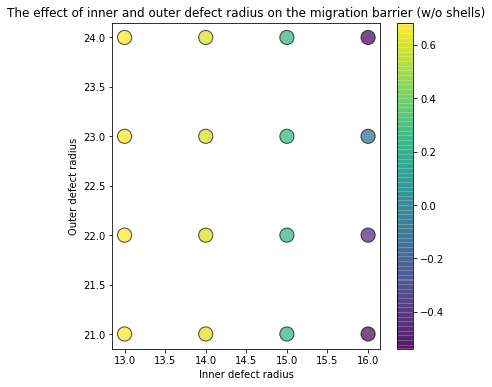

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

sctt = ax.scatter(innerr, outerr,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=activation)
plt.colorbar(sctt, ax=ax)
plt.title('The effect of inner and outer defect radius on the migration barrier (w/o shells)')
plt.xlabel('Inner defect radius')
plt.ylabel('Outer defect radius')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/3d_na3ocl_mig_noshel.jpg', bbox_inches='tight', dpi=500)